# Process subtypes for each aggregation type

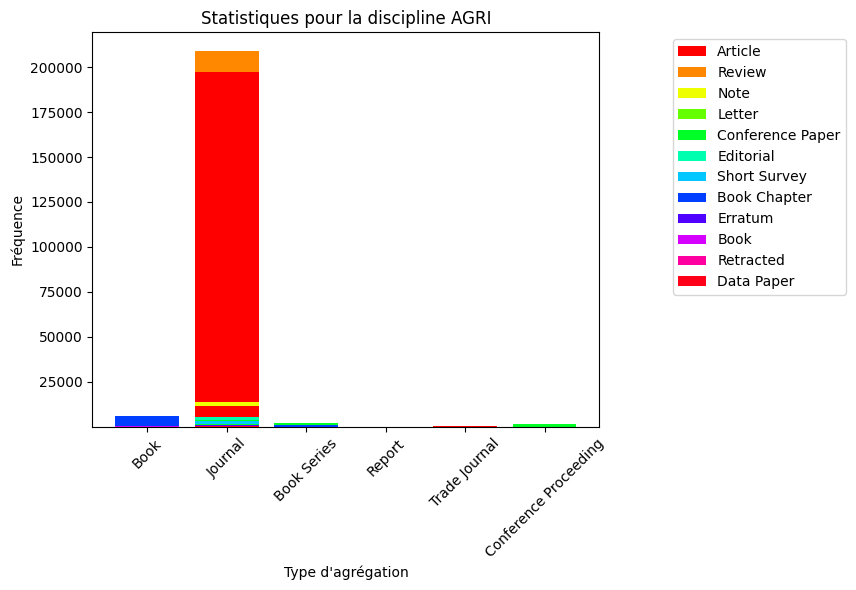

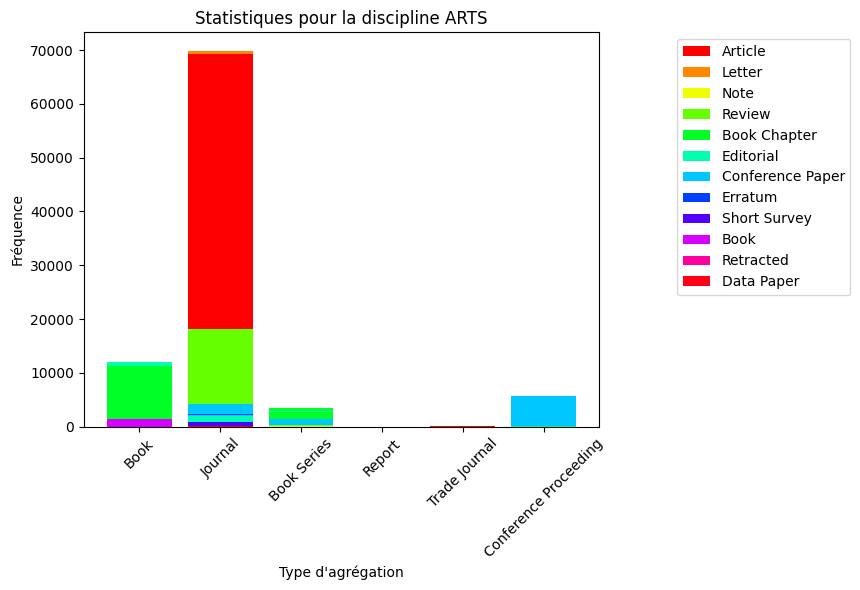

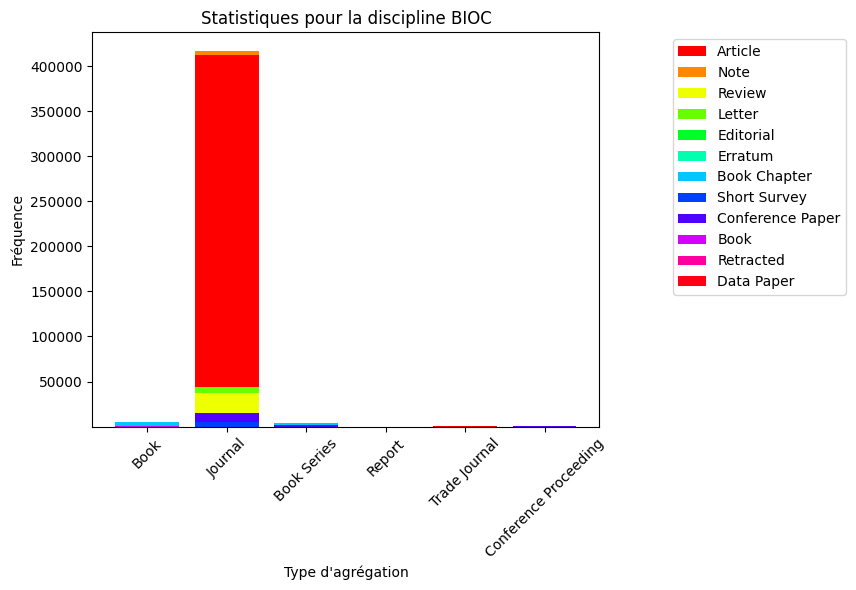

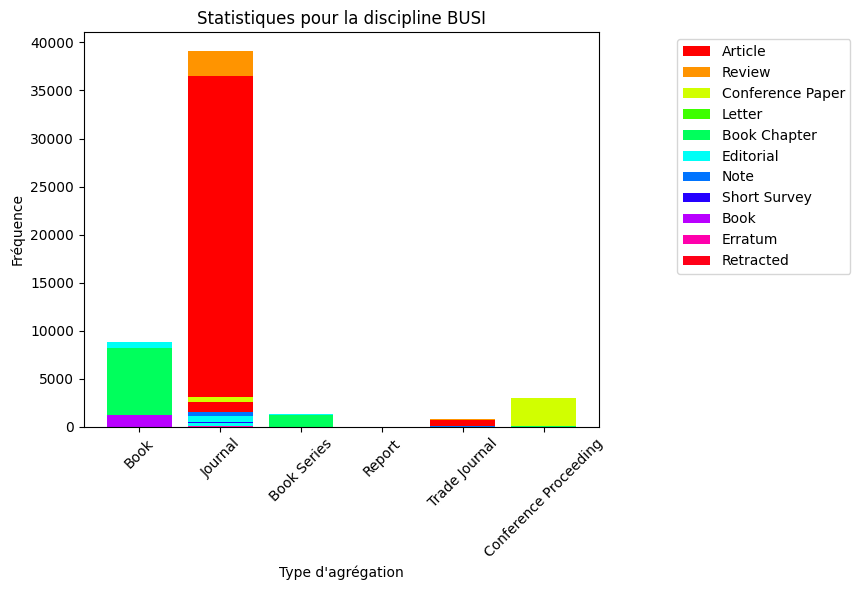

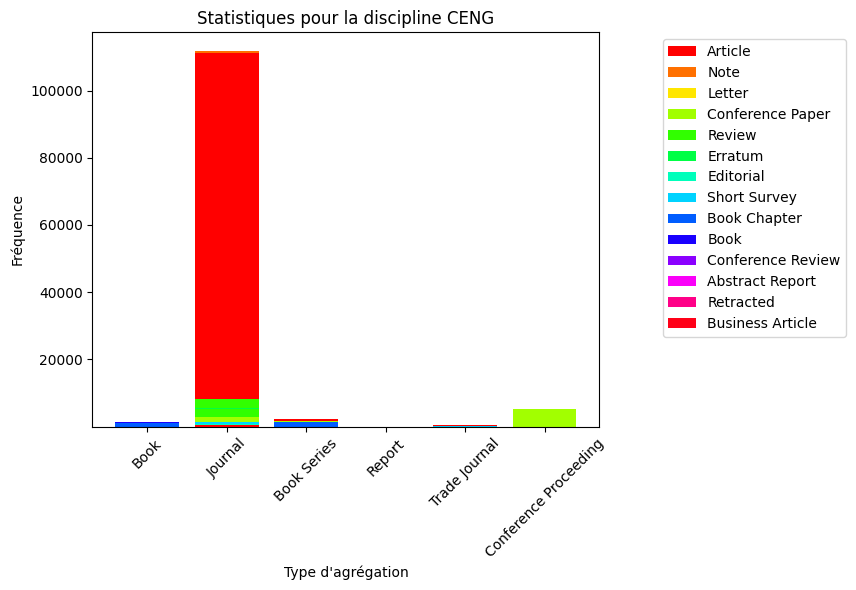

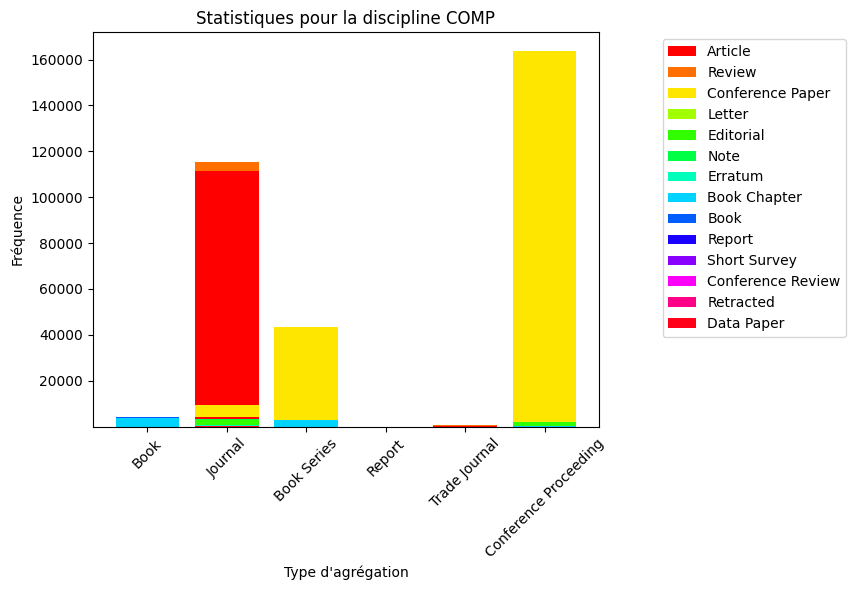

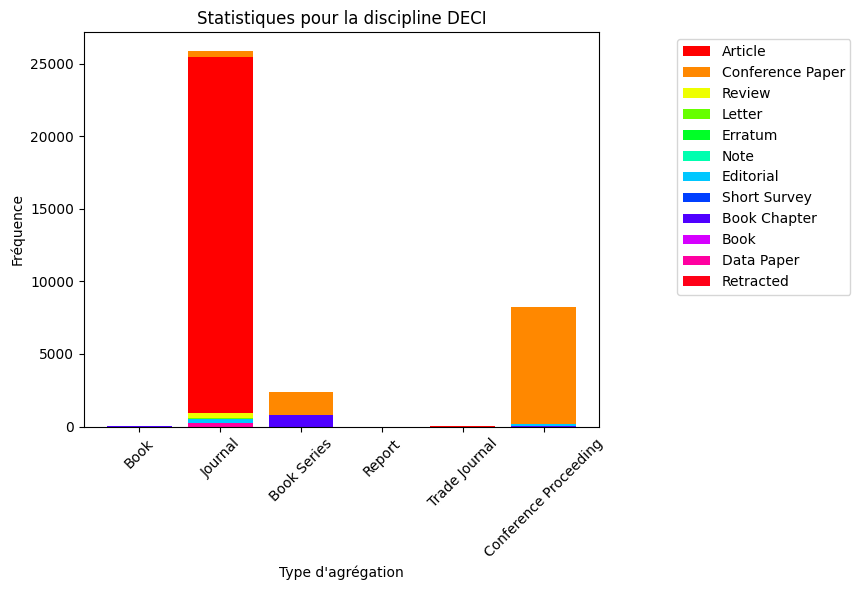

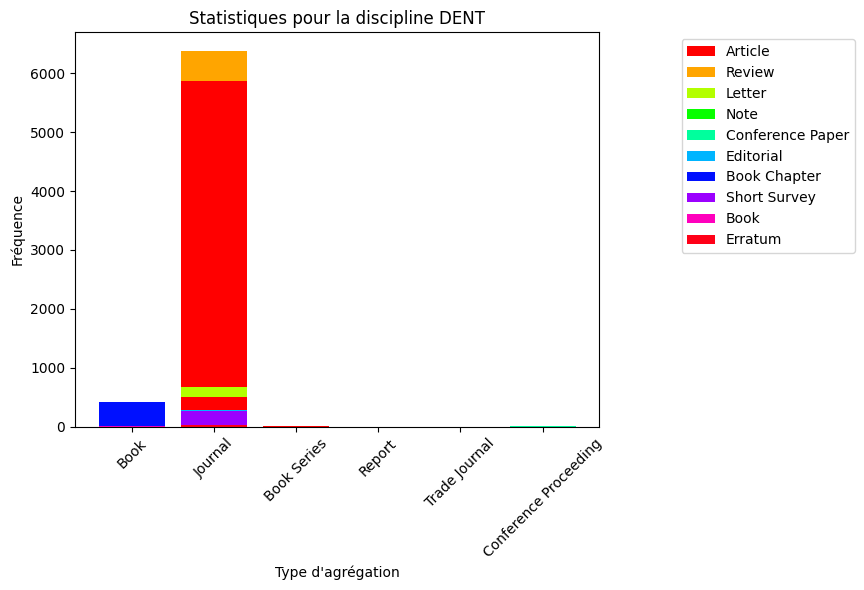

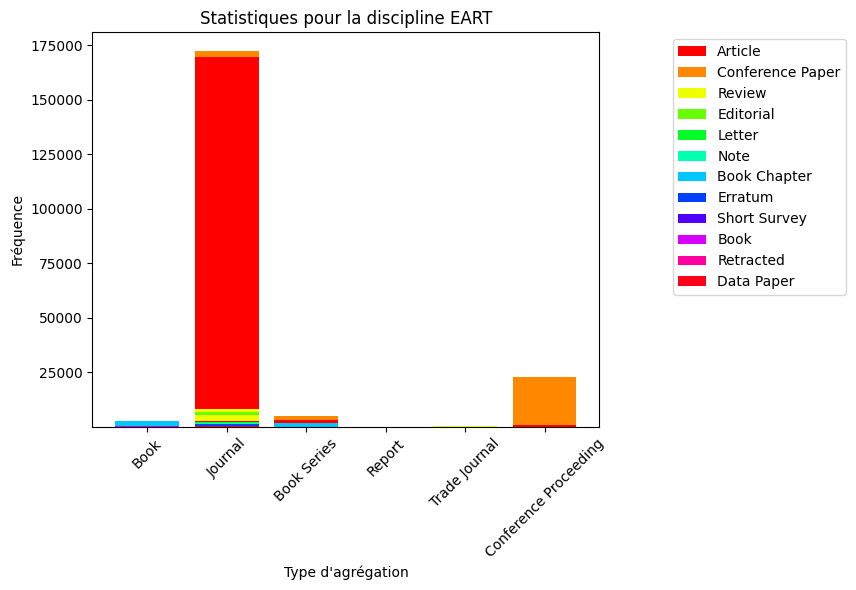

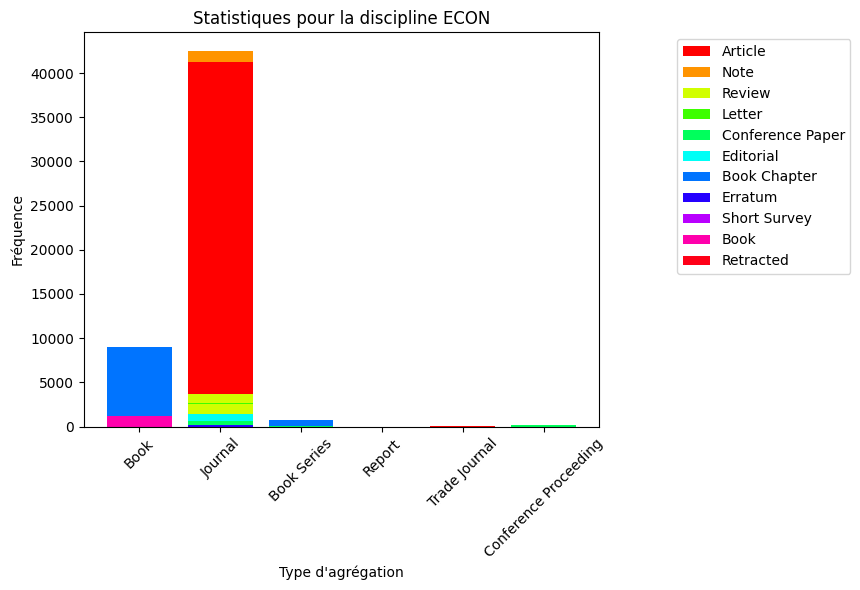

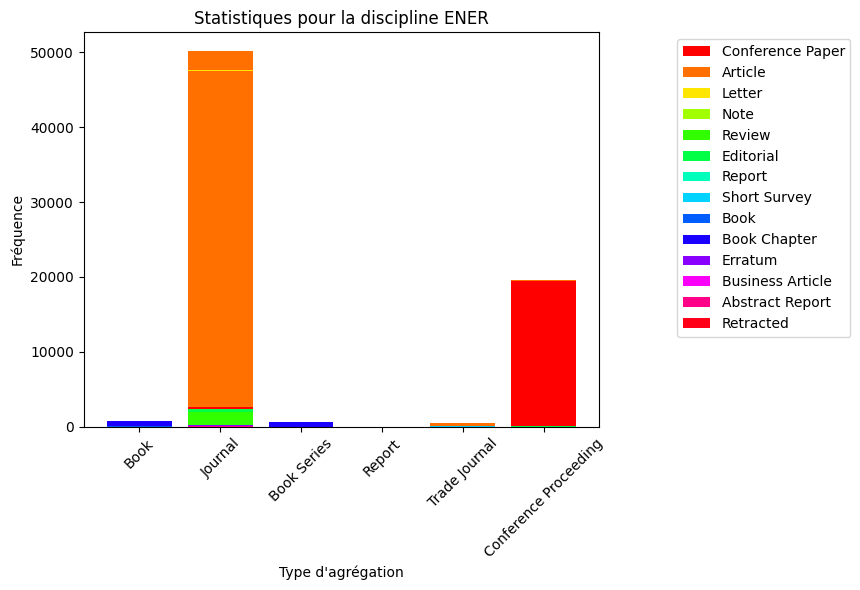

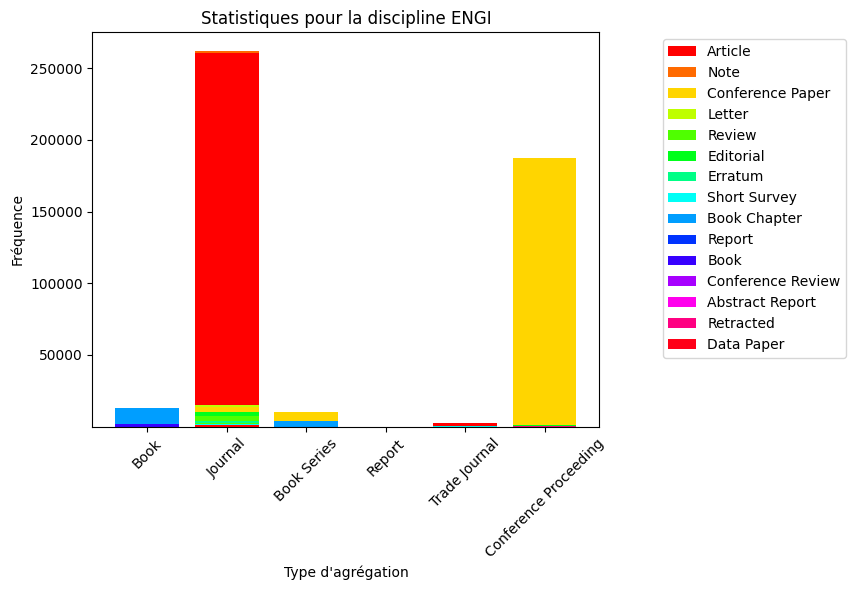

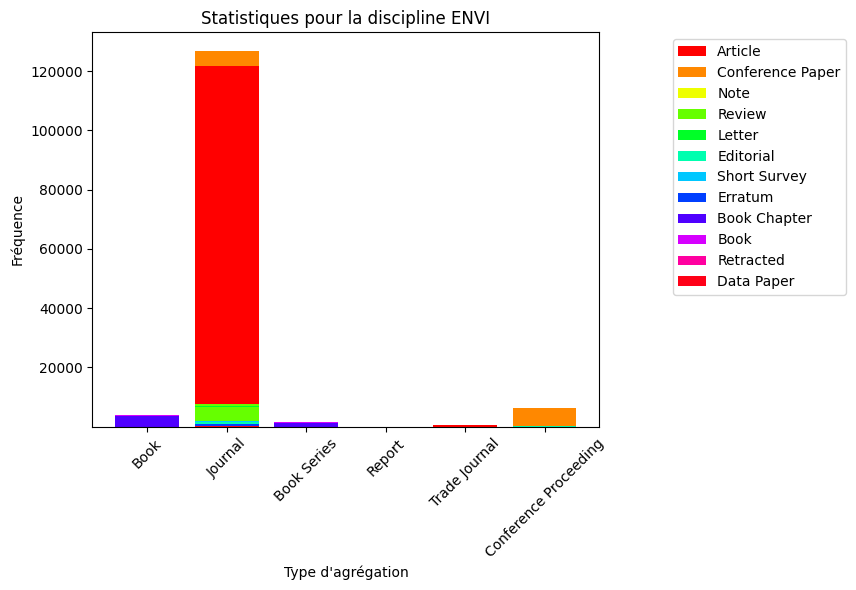

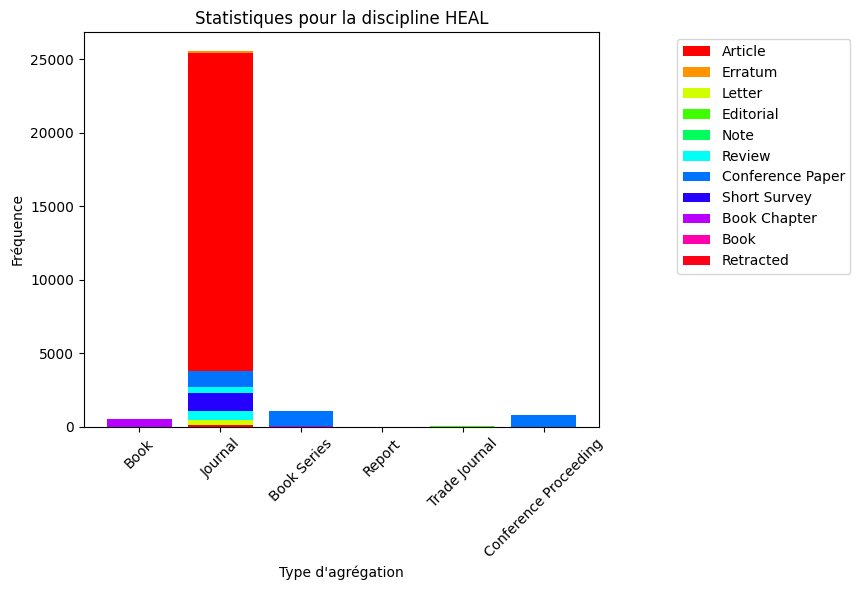

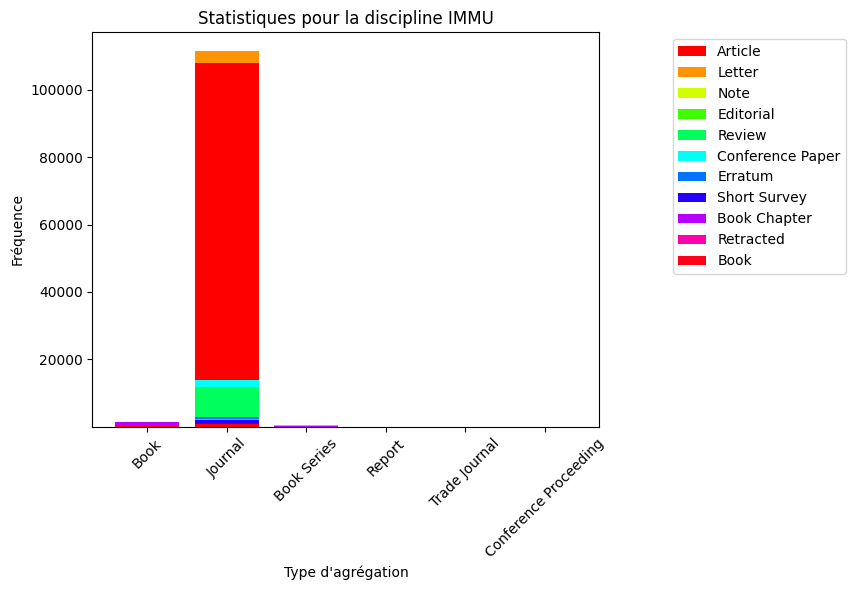

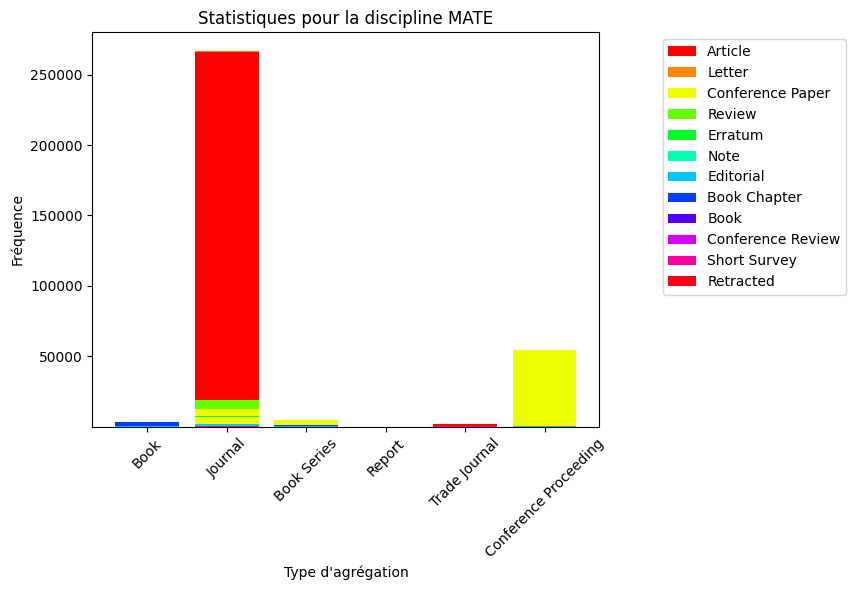

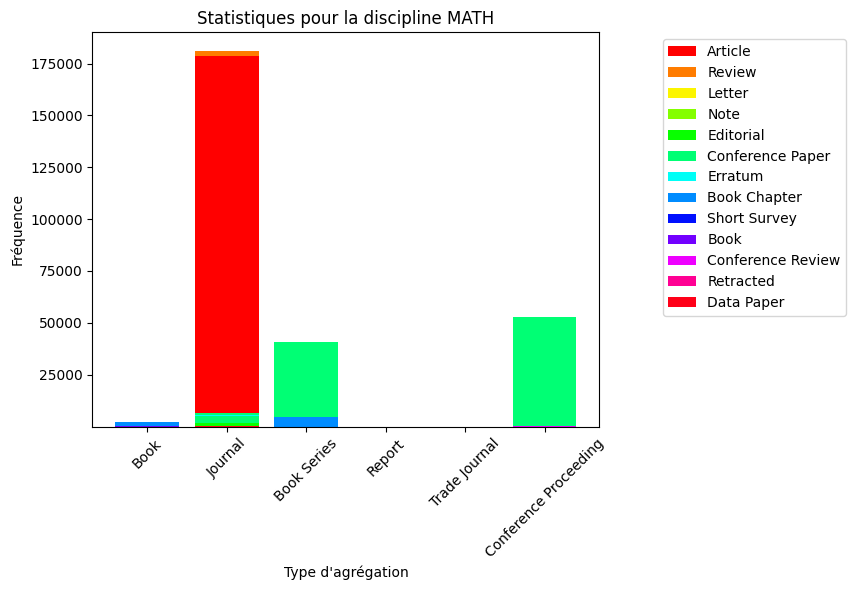

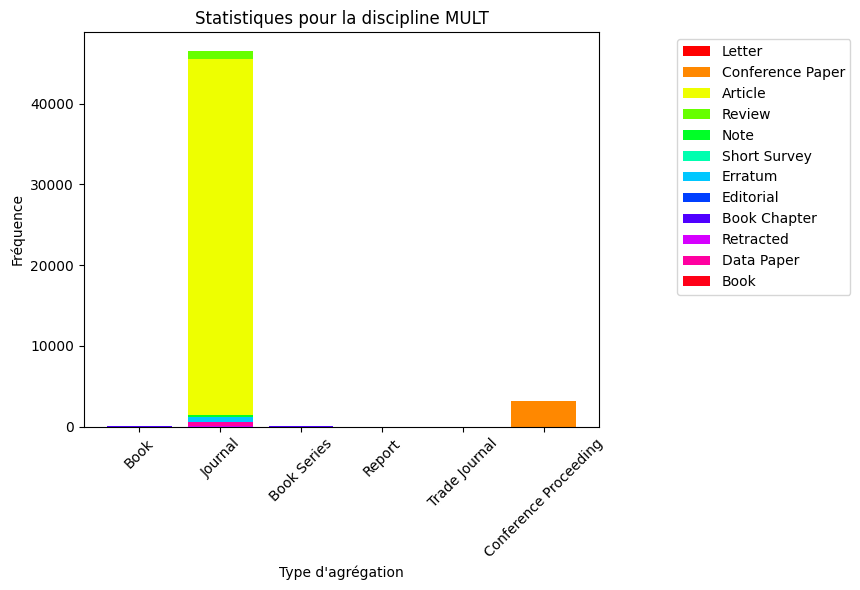

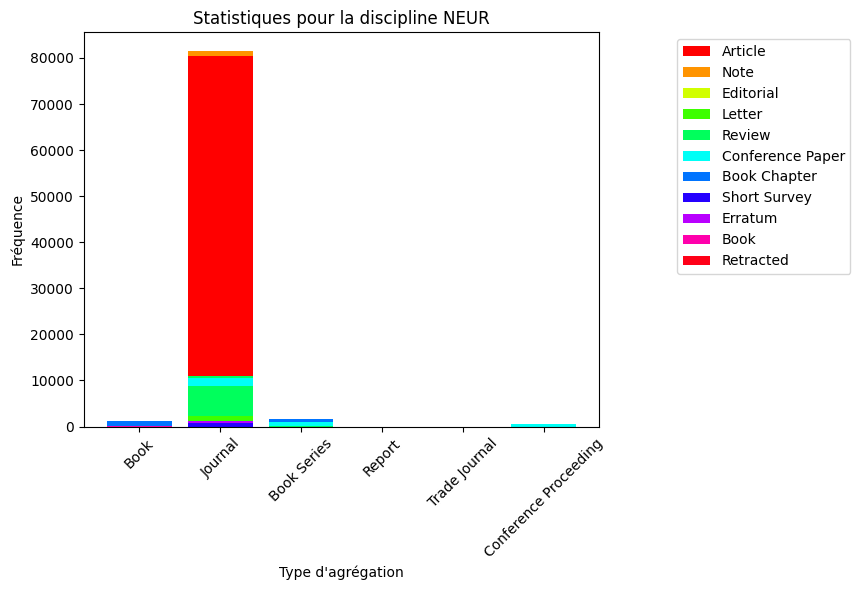

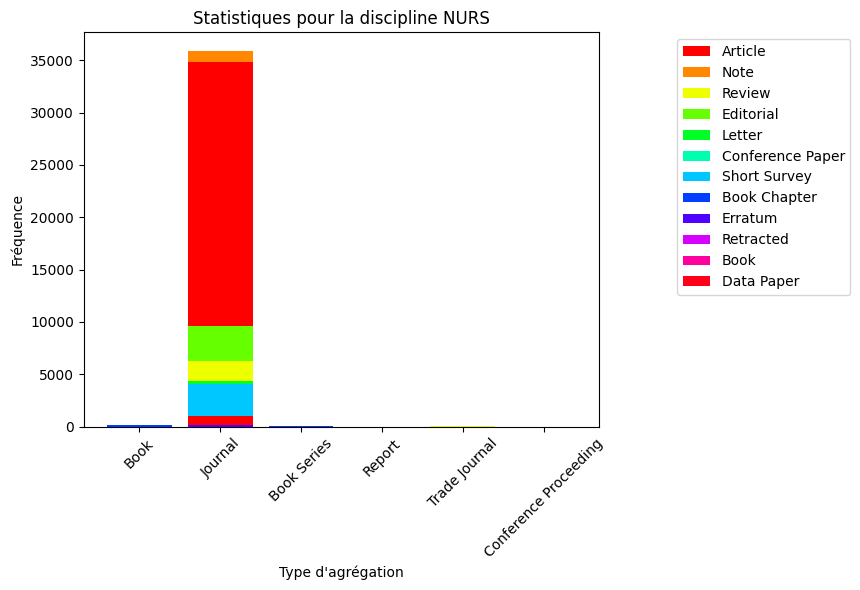

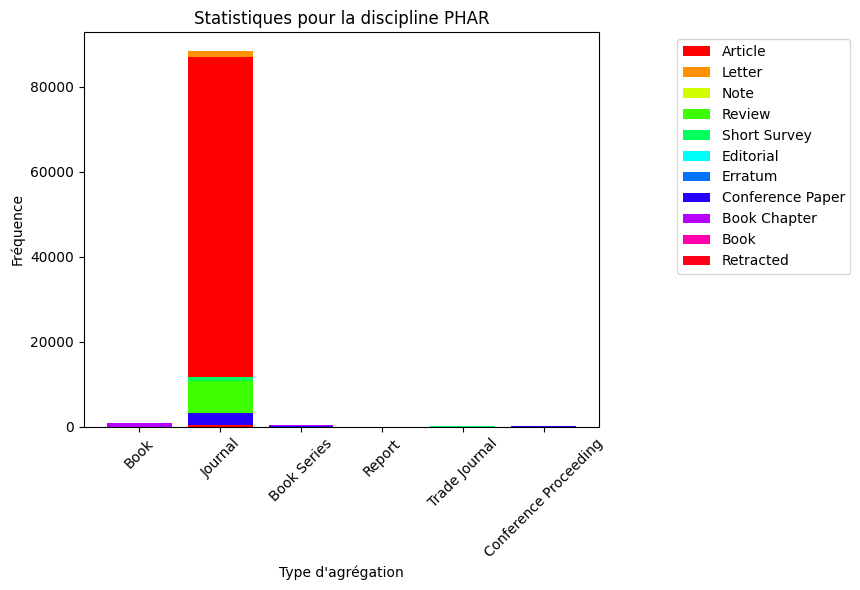

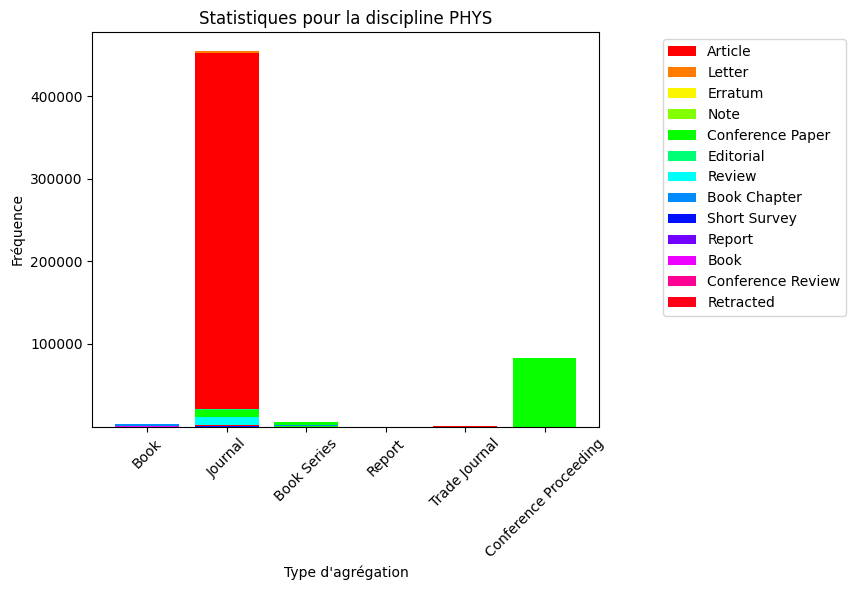

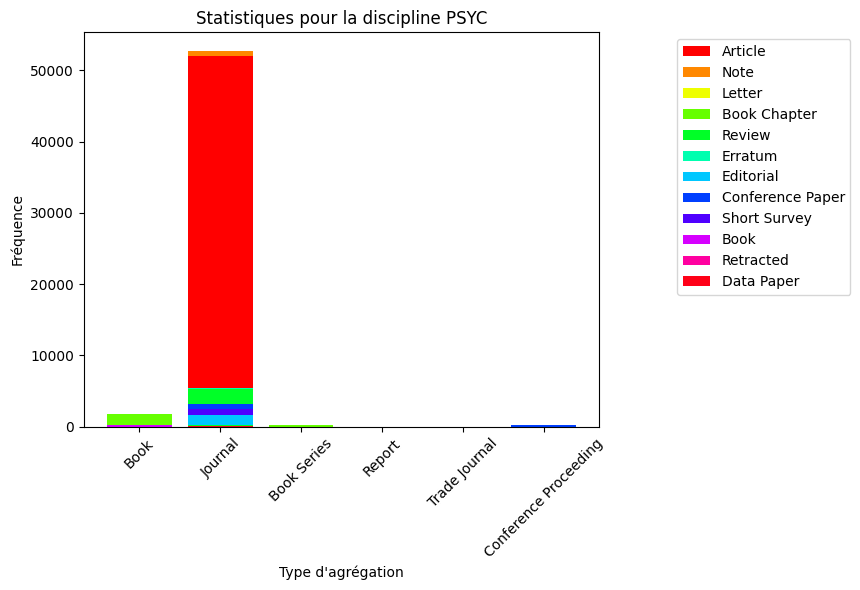

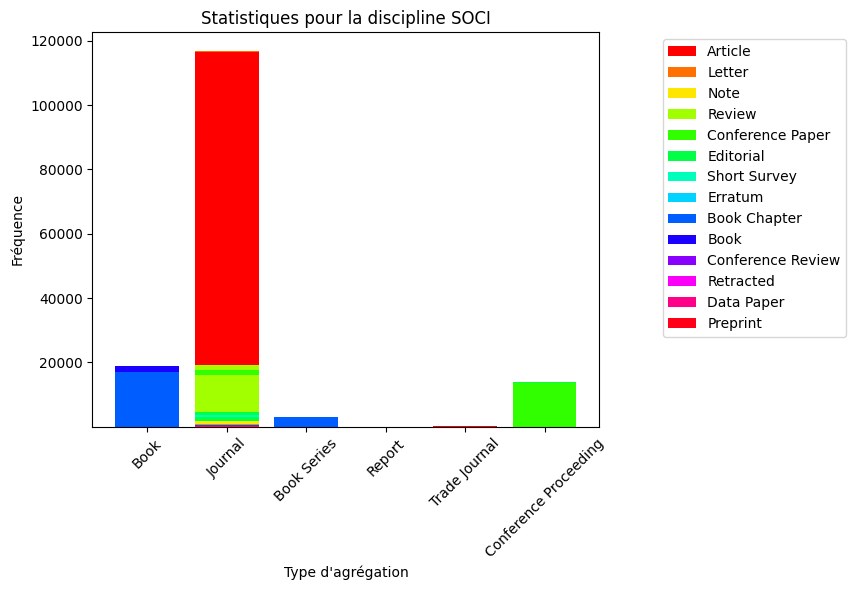

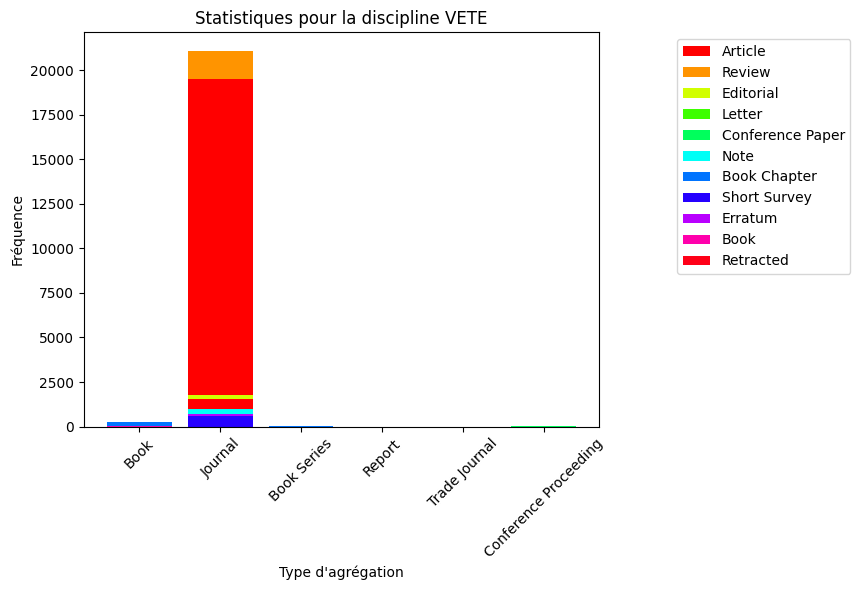

In [66]:
import numpy as np
import polars as pl
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

# Dossier où sont stockés les CSV
folder_path = Path('data/scopus')

# Initialiser un dictionnaire pour stocker les statistiques par discipline
stats_per_discipline = {}
detailed_counts = {}
agg_types = set()

# Liste des colonnes à charger pour éviter les erreurs (on exclut ici 'author_info')
cols_to_load = [
    'dc:identifier', 'prism:url',
    'prism:aggregationType', 'prism:eIssn', 'prism:issn', 
    'prism:issueIdentifier', 'prism:coverDisplayDate', 'subtypeDescription'
]

# Parcourir chaque fichier CSV dans le dossier
for file_path in folder_path.glob("*.csv"):
    try:
        # Lire le fichier CSV avec Polars en chargeant uniquement les colonnes nécessaires
        df = pl.read_csv(
            file_path,
            columns=cols_to_load,
            encoding="ISO-8859-1",
            ignore_errors=True
        )

        # Vérifier si la colonne 'prism:aggregationType' existe
        if 'prism:aggregationType' in df.columns and 'subtypeDescription' in df.columns:
            # Compter les occurrences de chaque type dans 'prism:aggregationType' en filtrant les valeurs None
            
            for agg_type, subtype_desc in zip(df['prism:aggregationType'], df['subtypeDescription']) :
                if agg_type is not None and subtype_desc is not None:
                    agg_types.add(agg_type)
                    if subtype_desc not in detailed_counts :
                        detailed_counts[subtype_desc] = {agg_type : 0}
                    if agg_type not in detailed_counts[subtype_desc] :
                        detailed_counts[subtype_desc][agg_type] = 0
                    detailed_counts[subtype_desc][agg_type] += 1

    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {file_path.name}: {e}")

agg_types = list(agg_types)

plt.pie(detailed_counts.values(), labels = detailed_counts.keys())